In [2]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from celluloid import Camera

import torch

In [11]:
w = torch.tensor([1.0, 1.0], requires_grad=True)
L = torch.sum(torch.tensor([1.0, 10.0]) * torch.pow(w, 2))

In [4]:
u = np.arange(-7, 7, 0.1)
X, Y = np.meshgrid(u, u)
Z = X**2 + 10*Y**2

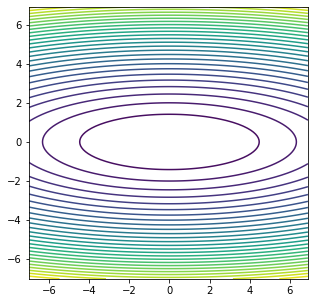

In [82]:
plt.figure(figsize=(5, 5))
plt.contour(X, Y, Z, levels=30)

In [83]:
# do gradient descent
w = torch.tensor([5.0, 5.0], requires_grad=True)
trajectory = [w.detach().cpu().numpy().copy()]
for _ in tqdm(range(500)):
    w.grad = None
    L = torch.sum(torch.tensor([1.0, 10.0]) * torch.pow(w, 2))
    L.backward()
    with torch.no_grad():
        w.sub_(0.01 * w.grad)
    trajectory.append(w.detach().cpu().numpy().copy())

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

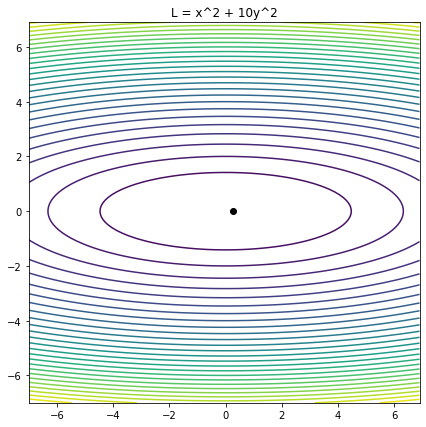

In [104]:
fig = plt.figure(figsize=(7, 7))
camera = Camera(fig)

w = torch.tensor([5.0, 5.0], requires_grad=True)
plt.contour(X, Y, X**2 + 10*Y**2, levels=30)
plt.scatter(*zip(w.detach().cpu().numpy().copy()), color='black')
plt.title("L = x^2 + 10y^2")
camera.snap()
            
for _ in tqdm(range(300)):
    w.grad = None
    L = torch.sum(torch.tensor([1.0, 10.0]) * torch.pow(w, 2))
    L.backward()
    with torch.no_grad():
        w.sub_(0.005 * w.grad)
    plt.contour(X, Y, X**2 + 10*Y**2, levels=30)
    plt.scatter(*zip(w.detach().cpu().numpy().copy()), color='black')
    plt.title("L = x^2 + 10y^2")
    camera.snap()
                
animation = camera.animate()
animation.save('../figures/convex-descent.mp4', writer='ffmpeg', fps=30, dpi=200)

### Let's do the same but with lots of solutions

In [119]:
np.random.uniform(low=-6, high=6, size=(2,))

array([-0.226869 , -4.6401587])

In [132]:
np.random.randn()

0.11659926797667097

  0%|          | 0/300 [00:00<?, ?it/s]

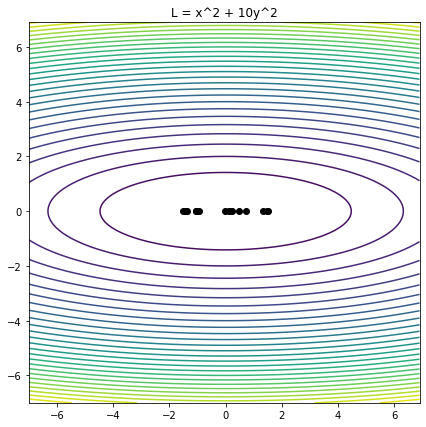

In [5]:
fig = plt.figure(figsize=(7, 7))
camera = Camera(fig)

ws = []
for _ in range(15):
    r = 5.0
    theta = 2 * np.pi * np.random.rand()
    ws.append(torch.tensor(r * np.array([np.cos(theta), np.sin(theta)]), requires_grad=True))

plt.contour(X, Y, X**2 + 10*Y**2, levels=30)
plt.scatter(*zip(*[w.detach().cpu().numpy().copy() for w in ws]), color='black')
plt.title("L = x^2 + 10y^2")
camera.snap()
            
for _ in tqdm(range(300)):
    for w in ws:
        w.grad = None
        L = torch.sum(torch.tensor([1.0, 10.0]) * torch.pow(w, 2))
        L.backward()
        with torch.no_grad():
            w.sub_(0.002 * w.grad)
    plt.contour(X, Y, X**2 + 10*Y**2, levels=30)
    plt.scatter(*zip(*[w.detach().cpu().numpy().copy() for w in ws]), color='black')
    plt.title("L = x^2 + 10y^2")
    camera.snap()
                
animation = camera.animate()
animation.save('../figures/convex-descent-many.mp4', writer='ffmpeg', fps=30, dpi=200)

In [141]:
def norm(x):
    return np.sqrt(np.sum(np.power(x, 2)))

In [164]:
ws = []
for _ in range(300):
    r = 5.0
    theta = 2 * np.pi * np.random.rand()
    ws.append(torch.tensor(r * np.array([np.cos(theta), np.sin(theta)]), requires_grad=True))
    
angles = []
for w in tqdm(ws):
    angles.append([])
    for _ in range(400):
        w.grad = None
        L = torch.sum(torch.tensor([1.0, 10.0]) * torch.pow(w, 2))
        L.backward()
        vec_to_minimum = -w.detach().cpu().numpy().copy()
        gradient = -w.grad.detach().cpu().numpy().copy()
        angles[-1].append(np.arccos(np.sum(vec_to_minimum * gradient) / (norm(vec_to_minimum) * norm(gradient))))
        with torch.no_grad():
            w.sub_(0.002 * w.grad)

  0%|          | 0/300 [00:00<?, ?it/s]

Text(0.5, 1.0, 'L = x^2 + 10y^2')

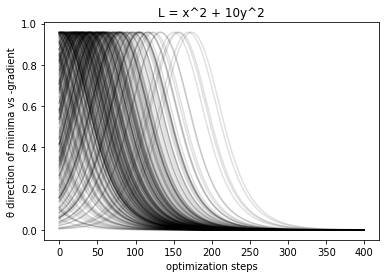

In [174]:
for angle_list in angles:
    plt.plot(list(range(400)), angle_list, color='black', alpha=0.12)
plt.xlabel("optimization steps")
plt.ylabel("θ direction of minima vs -gradient")
plt.title("L = x^2 + 10y^2")

  0%|          | 0/400 [00:00<?, ?it/s]

Text(0, 0.5, 'θ direction of minima vs -gradient')

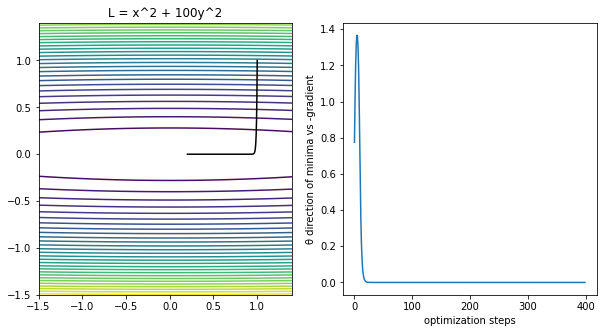

In [187]:
fig = plt.figure(figsize=(10, 5))

u = np.arange(-1.5, 1.5, 0.1)
X, Y = np.meshgrid(u, u)
Z = X**2 + 10*Y**2

w = torch.tensor([1.0, 1.0], requires_grad=True)

points = []
angles = []

for _ in tqdm(range(400)):
    w.grad = None
    L = torch.sum(torch.tensor([1.0, 100.0]) * torch.pow(w, 2))
    L.backward()
    vec_to_minimum = -w.detach().cpu().numpy().copy()
    opposite_gradient = -w.grad.detach().cpu().numpy().copy()
    angles.append(np.arccos(np.sum(vec_to_minimum * opposite_gradient) / (norm(vec_to_minimum) * norm(opposite_gradient))))
    points.append(w.detach().cpu().numpy().copy())
    with torch.no_grad():
        w.sub_(0.002 * w.grad)

plt.subplot(1, 2, 1)    
plt.contour(X, Y, X**2 + 100*Y**2, levels=30)
plt.plot(*zip(*points), color='black')
plt.title("L = x^2 + 100y^2")

plt.subplot(1, 2, 2)
plt.plot(list(range(400)), angles)
plt.xlabel("optimization steps")
plt.ylabel("θ direction of minima vs -gradient")

### Let's look at the trajectories of a bunch of first-order optimizers

Let's look at SGD, Momentum, RMSProp, and Adam for several different learning rates.

Text(0.5, 0.98, '200 Steps of optimization; lr=0.01')

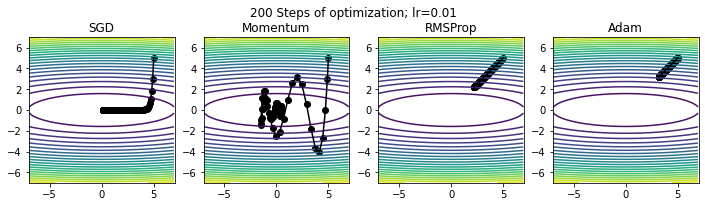

In [81]:
a = 20
steps = 200
lr = 0.01


u = np.arange(-7, 7, 0.05)
X, Y = np.meshgrid(u, u)
Z = X**2 + a * Y**2

plt.figure(figsize=(12, 3))

ax = plt.subplot(1, 4, 1)
w = torch.tensor([5., 5.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
optimizer = torch.optim.SGD([w], lr=lr)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("SGD")
ax.set_aspect('equal')


ax = plt.subplot(1, 4, 2)
w = torch.tensor([5., 5.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
optimizer = torch.optim.SGD([w], lr=lr, momentum=0.9)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("Momentum")
ax.set_aspect('equal')


ax = plt.subplot(1, 4, 3)
w = torch.tensor([5., 5.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
optimizer = torch.optim.RMSprop([w], lr=lr)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("RMSProp")
ax.set_aspect('equal')


ax = plt.subplot(1, 4, 4)
w = torch.tensor([5., 5.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
optimizer = torch.optim.Adam([w], lr=lr)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("Adam")
ax.set_aspect('equal')

plt.suptitle(f"{steps} Steps of optimization; lr={lr}")

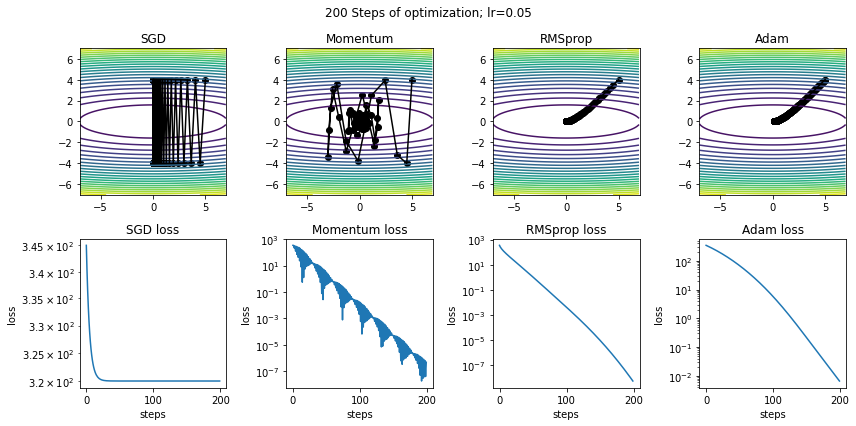

In [157]:
a = 20
steps = 200
lr = 0.05


u = np.arange(-7, 7, 0.05)
X, Y = np.meshgrid(u, u)
Z = X**2 + a * Y**2

plt.figure(figsize=(12, 6))

w = torch.tensor([5., 4.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
losses = []
optimizer = torch.optim.SGD([w], lr=lr)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    losses.append(L.item())
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
ax = plt.subplot(2, 4, 1)
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("SGD")
ax.set_aspect('equal')

ax = plt.subplot(2, 4, 5)
plt.plot(losses)
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.title("SGD loss")


ax = plt.subplot(2, 4, 2)
w = torch.tensor([5., 4.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
losses = []
optimizer = torch.optim.SGD([w], lr=lr, momentum=0.9)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    losses.append(L.item())
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("Momentum")
ax.set_aspect('equal')

ax = plt.subplot(2, 4, 6)
plt.plot(losses)
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.title("Momentum loss")


ax = plt.subplot(2, 4, 3)
w = torch.tensor([5., 4.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
losses = []
optimizer = torch.optim.RMSprop([w], lr=lr)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    losses.append(L.item())
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("RMSprop")
ax.set_aspect('equal')

ax = plt.subplot(2, 4, 7)
plt.plot(losses)
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.title("RMSprop loss")


ax = plt.subplot(2, 4, 4)
w = torch.tensor([5., 4.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
losses = []
optimizer = torch.optim.Adam([w], lr=lr)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    losses.append(L.item())
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("Adam")
ax.set_aspect('equal')

ax = plt.subplot(2, 4, 8)
plt.plot(losses)
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.title("Adam loss")


plt.suptitle(f"{steps} Steps of optimization; lr={lr}")
plt.tight_layout()

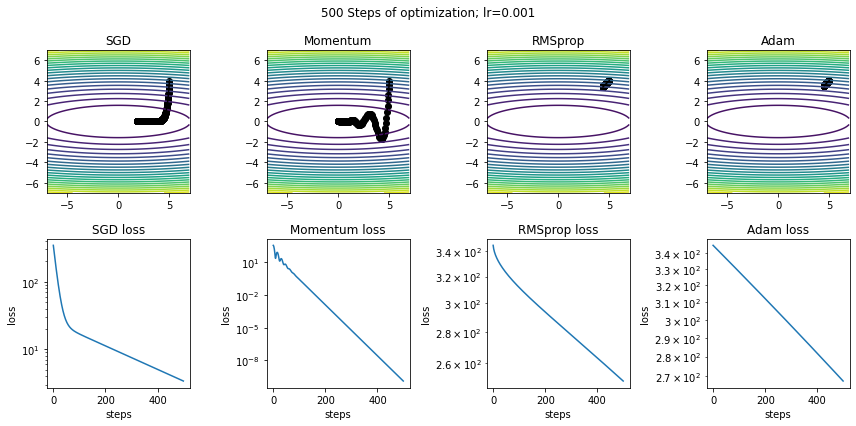

In [158]:
a = 20
steps = 500
lr = 0.001


u = np.arange(-7, 7, 0.05)
X, Y = np.meshgrid(u, u)
Z = X**2 + a * Y**2

plt.figure(figsize=(12, 6))

w = torch.tensor([5., 4.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
losses = []
optimizer = torch.optim.SGD([w], lr=lr)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    losses.append(L.item())
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
ax = plt.subplot(2, 4, 1)
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("SGD")
ax.set_aspect('equal')

ax = plt.subplot(2, 4, 5)
plt.plot(losses)
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.title("SGD loss")


ax = plt.subplot(2, 4, 2)
w = torch.tensor([5., 4.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
losses = []
optimizer = torch.optim.SGD([w], lr=lr, momentum=0.9)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    losses.append(L.item())
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("Momentum")
ax.set_aspect('equal')

ax = plt.subplot(2, 4, 6)
plt.plot(losses)
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.title("Momentum loss")


ax = plt.subplot(2, 4, 3)
w = torch.tensor([5., 4.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
losses = []
optimizer = torch.optim.RMSprop([w], lr=lr)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    losses.append(L.item())
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("RMSprop")
ax.set_aspect('equal')

ax = plt.subplot(2, 4, 7)
plt.plot(losses)
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.title("RMSprop loss")


ax = plt.subplot(2, 4, 4)
w = torch.tensor([5., 4.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
losses = []
optimizer = torch.optim.Adam([w], lr=lr)
for _ in range(steps):
    optimizer.zero_grad()
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    losses.append(L.item())
    L.backward()
    optimizer.step()
    ws.append(w.detach().cpu().numpy().copy())
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("Adam")
ax.set_aspect('equal')

ax = plt.subplot(2, 4, 8)
plt.plot(losses)
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.title("Adam loss")


plt.suptitle(f"{steps} Steps of optimization; lr={lr}")
plt.tight_layout()

### Conjugate gradients

Text(0.5, 1.0, 'Conjugate Gradients Loss')

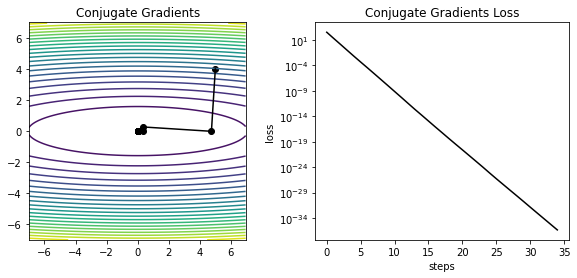

In [144]:
steps = 35
sigma = 0.00001

w = torch.tensor([5., 4.], requires_grad=True)
ws = [w.detach().cpu().numpy().copy()]
losses = []

t = 1
dtm1 = 0
gtm1 = 0
for _ in range(steps):
    w.grad = None
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w, 2))
    L.backward()
    losses.append(L.item())
    g_t = w.grad
    if t == 1:
        d_t = -g_t
    else:
        beta = torch.sum(g_t * g_t) / torch.sum(gtm1 * gtm1)
        d_t = -g_t + beta * dtm1
    # compute Hd_t
    w_shifted = torch.tensor(w.detach().cpu().numpy().copy()) + sigma * d_t
    w_shifted.requires_grad = True
    L = torch.sum(torch.tensor([1., float(a)]) * torch.pow(w_shifted, 2))
    L.backward()
    g_t_shifted = w_shifted.grad
    Hd_t = (g_t_shifted - g_t) / sigma
    
    # compute optimal step size and perform step
    epsilon = -torch.sum(g_t * d_t) / (torch.sum(d_t * Hd_t))
    with torch.no_grad():
        w.add_(epsilon * d_t)
    dtm1 = d_t
    gtm1 = g_t
    
    # record ws for plotting
    ws.append(w.detach().cpu().numpy().copy())
    

plt.figure(figsize=(10, 4))
ax = plt.subplot(1, 2, 1)
xs, ys = zip(*ws)
plt.contour(X, Y, Z, levels=20)
plt.plot(xs, ys, color='black')
plt.scatter(xs, ys, color='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("Conjugate Gradients")
ax.set_aspect('equal')

ax = plt.subplot(1, 2, 2)
plt.plot(losses, color='black')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("steps")
plt.title("Conjugate Gradients Loss")